In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:
pd.reset_option('all')

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df['drivewheel']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drivewheel, Length: 205, dtype: object

In [5]:
drivewheel_encoding={'4wd':1,'rwd':0,'fwd':-1}
df=df.replace({'drivewheel':drivewheel_encoding})

In [6]:
df.set_index('car_ID',inplace=True)

In [7]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,0,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,-1,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,1,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,0,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,0,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,0,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [8]:
df.describe()

,symboling,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,-0.541463,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.581148,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,-1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,-1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,-1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.shape

(205, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [11]:
#searching for any missing values
df.columns.value_counts()

symboling           1
enginetype          1
highwaympg          1
citympg             1
peakrpm             1
horsepower          1
compressionratio    1
stroke              1
boreratio           1
fuelsystem          1
enginesize          1
cylindernumber      1
curbweight          1
CarName             1
carheight           1
carwidth            1
carlength           1
wheelbase           1
enginelocation      1
drivewheel          1
carbody             1
doornumber          1
aspiration          1
fueltype            1
price               1
Name: count, dtype: int64

In [12]:
#door_number replace with 2 and 4 int instead of two and four
two_and_four={'two':2,'four':4}
df=df.replace({"doornumber":two_and_four})


In [13]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,2,convertible,0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,2,convertible,0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,0,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,4,sedan,-1,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,4,sedan,1,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,4,sedan,0,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,4,sedan,0,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,4,sedan,0,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [14]:
df.drop(columns=['enginelocation'],axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,2,convertible,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,2,convertible,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,0,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,4,sedan,-1,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,4,sedan,1,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,4,sedan,0,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,4,sedan,0,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,4,sedan,0,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [15]:
#we can calculate volume instead of the lenght height and wdth seperately
df['car_volume']=df['carheight']*df['carlength']*df['carwidth']
df.drop(columns=['carheight','carlength','carwidth'],axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,2,convertible,0,front,88.6,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
2,3,alfa-romero stelvio,gas,std,2,convertible,0,front,88.6,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,0,front,94.5,2823,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
4,2,audi 100 ls,gas,std,4,sedan,-1,front,99.8,2337,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
5,2,audi 100ls,gas,std,4,sedan,1,front,99.4,2824,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,4,sedan,0,front,109.1,2952,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,721961.760
202,-1,volvo 144ea,gas,turbo,4,sedan,0,front,109.1,3049,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,720913.920
203,-1,volvo 244dl,gas,std,4,sedan,0,front,109.1,3012,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,721961.760


In [16]:
df.drop(columns=['CarName'],inplace=True)

In [17]:
cylinder_string_to_int={
    'two':2,
    'four':4,
    'six':6,
    'five':5
}
df=df.replace({'cylindernumber':cylinder_string_to_int})

In [18]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,2,convertible,0,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
2,3,gas,std,2,convertible,0,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
3,1,gas,std,2,hatchback,0,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
4,2,gas,std,4,sedan,-1,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
5,2,gas,std,4,sedan,1,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,4,sedan,0,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,721961.760
202,-1,gas,turbo,4,sedan,0,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,720913.920
203,-1,gas,std,4,sedan,0,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,721961.760


In [19]:
fuel_system_encoding = {
    "mpfi": 3,
    "2bbl": -1,
    "idi": 2,
    "1bbl": -2,
    "spdi": 0,
    "4bbl": -3,
    "mfi": 1,
    "spfi": -4
}

df=df.replace({'fuelsystem':fuel_system_encoding})

In [20]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,2,convertible,0,front,88.6,168.8,64.1,...,3,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
2,3,gas,std,2,convertible,0,front,88.6,168.8,64.1,...,3,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
3,1,gas,std,2,hatchback,0,front,94.5,171.2,65.5,...,3,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
4,2,gas,std,4,sedan,-1,front,99.8,176.6,66.2,...,3,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
5,2,gas,std,4,sedan,1,front,99.4,176.6,66.4,...,3,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,4,sedan,0,front,109.1,188.8,68.9,...,3,3.78,3.15,9.5,114,5400,23,28,16845.0,721961.760
202,-1,gas,turbo,4,sedan,0,front,109.1,188.8,68.8,...,3,3.78,3.15,8.7,160,5300,19,25,19045.0,720913.920
203,-1,gas,std,4,sedan,0,front,109.1,188.8,68.9,...,3,3.58,2.87,8.8,134,5500,18,23,21485.0,721961.760


In [21]:
df['aspiration']

car_ID
1        std
2        std
3        std
4        std
5        std
       ...  
201      std
202    turbo
203      std
204    turbo
205    turbo
Name: aspiration, Length: 205, dtype: object

In [22]:
df['fuelsystem']

car_ID
1      3
2      3
3      3
4      3
5      3
      ..
201    3
202    3
203    3
204    2
205    3
Name: fuelsystem, Length: 205, dtype: int64

In [23]:
aspiration_encoding={'std':0,'turbo':1}
df=df.replace({'aspiration':aspiration_encoding})

In [24]:
X=df[['wheelbase','car_volume','curbweight','boreratio','horsepower','citympg','stroke','drivewheel']].values
y=df[['price']].values

In [25]:
from sklearn.model_selection import train_test_split


train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
# from sklearn.metrics import r2_score
# test_sizes=[0.1,0.2,0.3,0.4]
# model=LinearRegression()

# for i in range(10000):
#     res=[]
#     for test in test_sizes:
#         train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=test,random_state=1)
#         train=model.fit(train_X,train_y)
#         prediction=model.predict(test_X)
#         pred=r2_score(y_true=test_y, y_pred=prediction)
#         res.append(pred)
# print(res)

# # res:[0.8271015089105017, 0.8010391496274227, 0.8152147087386992, 0.8260386038657263]
# # if we take 0.1 we underfit(high bias)
# # if we take 0.4 we might overfit
# # hence we take 0.2 and then tune other hyperparameters      
        

In [27]:
model=LinearRegression()
train=model.fit(train_X,train_y)

In [28]:
prediction=model.predict(test_X)
print(prediction)

[[ 5605.97383846]
 [ 6109.10747297]
 [ 5707.45871196]
 [ 6219.34603003]
 [ 9566.79018146]
 [22469.59542188]
 [ 5796.65283193]
 [ 2012.43889551]
 [ 5524.11575256]
 [ 9954.26019436]
 [15230.68733907]
 [16726.09984381]
 [18270.50761017]
 [ 8904.27669427]
 [16925.88980512]
 [14498.67799585]
 [ 8198.65140784]
 [ 5616.04903932]
 [20410.30562931]
 [13798.05450398]
 [10771.84447032]
 [ 4241.55883763]
 [11876.30331711]
 [ 8739.83722404]
 [13559.96204372]
 [ 5733.38853334]
 [17827.08029854]
 [ 7348.77327753]
 [ 5301.29611558]
 [ 6638.42323703]
 [ 7135.95882408]
 [11316.12763647]
 [26438.17410041]
 [10510.41714512]
 [18260.83291606]
 [ 7326.7721224 ]
 [ 9192.02585212]
 [30455.63909203]
 [13974.671691  ]
 [17854.38390461]
 [ 6668.10380096]]


Text(0, 0.5, 'pred')

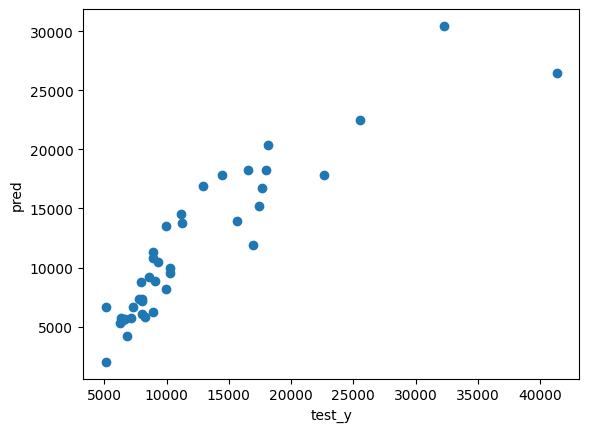

In [29]:
plt.scatter(test_y, prediction)
plt.xlabel('test_y')
plt.ylabel('pred')

In [30]:
from sklearn.metrics import r2_score
scr=r2_score(y_true=test_y, y_pred=prediction)
print(f'Accuracy of the prediction is: {scr*100}%')

Accuracy of the prediction is: 81.56087645616303
